![](https://www.dii.uchile.cl/wp-content/uploads/2021/06/Magi%CC%81ster-en-Ciencia-de-Datos.png)


# Proyecto: Riesgo en el Banco Giturra

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

### Cuerpo Docente:

- Profesor: Pablo Badilla, Ignacio Meza De La Jara
- Auxiliar: Sebastián Tinoco
- Ayudante: Diego Cortez M., Felipe Arias T.

_Por favor, lean detalladamente las instrucciones de la tarea antes de empezar a escribir._


### Equipo: 

- Nombre de alumno 1: Luis Gutiérrez 
- Nombre de alumno 2: Juan Carlos Cuevas

### **Link de repositorio de GitHub:** `https://github.com/LuisGutierrezG/LuisGutierrezG-LABS`

---

## Reglas

- Fecha de entrega: 01/06/2021
- **Grupos de 2 personas.**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Estrictamente prohibida la copia.
- Pueden usar cualquier material del curso que estimen conveniente.


---


# Presentación del Problema


![](https://www.diarioeldia.cl/u/fotografias/fotosnoticias/2019/11/8/67218.jpg)


**Giturra**, un banquero astuto y ambicioso, estableció su propio banco con el objetivo de obtener enormes ganancias. Sin embargo, su reputación se vio empañada debido a las tasas de interés usureras que imponía a sus clientes. A medida que su banco crecía, Giturra enfrentaba una creciente cantidad de préstamos impagados, lo que amenazaba su negocio y su prestigio.

Para abordar este desafío, Giturra reconoció la necesidad de reducir los riesgos de préstamo y mejorar la calidad de los préstamos otorgados. Decidió aprovechar la ciencia de datos y el análisis de riesgo crediticio. Contrató a un equipo de expertos para desarrollar un modelo predictivo de riesgo crediticio.

Cabe señalar que lo modelos solicitados por el banquero deben ser interpretables. Ya que estos le permitira al equipo comprender y explicar cómo se toman las decisiones crediticias. Utilizando visualizaciones claras y explicaciones detalladas, pudieron identificar las características más relevantes, le permitirá analizar la distribución de la importancia de las variables y evaluar si los modelos son coherentes con el negocio.

Para esto Giturra les solicita crear un modelo de riesgo disponibilizandoles una amplia gama de variables de sus usuarios: como historiales de crédito, ingresos y otros factores financieros relevantes, para evaluar la probabilidad de incumplimiento de pago de los clientes. Con esta información, Giturra podra tomar decisiones más informadas en cuanto a los préstamos, ofreciendo condiciones más favorables a aquellos con menor riesgo de impago.


## Instalación de Librerías y Carga de Datos.


Para el desarrollo de su proyecto, utilice el conjunto de datos `dataset.pq` para entrenar un modelo de su elección. Además, se adjunta junto con los datos del proyecto un archivo llamado `requirements.txt` que contiene todas las bibliotecas y versiones necesarias para el desarrollo del proyecto. Se le recomienda levantar un ambiente de `conda` para instalar estas librerías y así evitar cualquier problema con las versiones.


# RESPUESTAS

** Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#pipeline
from sklearn.pipeline import Pipeline

# Prepross
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import StandardScaler

# utils
from sklearn.model_selection import train_test_split 
import missingno as msno


# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Modelos
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from xgboost import plot_importance

# Validación cruzada
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# warnings
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

#importance
import shap

# imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

## 1. Introducción [0.5 puntos]

_Esta sección es literalmente una muy breve introducción con todo lo necesario para entender que hicieron en su proyecto._

- Describir brevemente el problema planteado (¿Qué se intenta predecir?)
- Describir brevemente los datos de entrada que les provee el problema.
- Describir las métricas que utilizarán para evaluar los modelos generados. Eligan **una métrica** adecuada para el desarrollo del proyecto **según la tarea que deben resolver y la institución a la cuál será su contraparte** y luego justifiquen su elección. Considerando que los datos presentan desbalanceo y que el uso de la métrica 'accuracy' sería incorrecto, enfoquen su elección en una de las métricas precision, recall o f1-score y en la clase que será evaluada.
- [Escribir al final] Describir brevemente el modelo que usaron para resolver el problema (incluyendo las transformaciones intermedias de datos).
- [Escribir al final] Indicar si lograron resolver el problema a través de su modelo. Indiquen además si creen que los resultados de su mejor modelo son aceptables y como les fue con respecto al resto de los equipos.


**R:**
- En este problema intentamos predecir la probabilidad/riesgo de impago de los clientes, siendo 1 si es riesgoso y 0 si no.
- Los datos de entrada son variables que describen a los clientes, sus caracterísitcas y su historial crediticio.
- Las métricas que se utilizarán para evaluar los modelos dependen de la modelación del problema. En este caso, al ser un problema de clasificación, se utilizará la métrica F1-Score, ya que es una métrica que considera tanto la precisión como el recall y es una métrica que se utiliza para problemas de clasificación binaria. Además, probablemente nos interes en particular el recall y precisión para la clase 1, que es la clase que nos interesa predecir.

### 2. Carga de datos Análisis Exploratorio de Datos [Sin puntaje]

_La idea de esta sección es que cargen y exploren el dataset para así obtener una idea de como son los datos y como se relacionan con el problema._

Cargue los datos y realice un análisis exploratorio de datos para investigar patrones, tendencias y relaciones en un conjunto de datos. Se adjuntan diversos scripts para abodar rápidamente este punto. La descripción de las columnas las pueden encontrar en el siguiente [enlace](https://www.kaggle.com/datasets/parisrohan/credit-score-classification).

**NO deben escribir nada**, solo ejecutar el código y encontrar los patrones con los cuales se basaran para generar el modelo.

In [2]:
# se carga la data "dataset.pq" en un dataframe
df = pd.read_parquet('dataset.pq')
df.head()

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,4.0,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,0
1,CUS_0x21b1,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,...,2.0,605.03,32.933856,27.0,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,0
2,CUS_0x2dbc,34.0,Engineer,143162.64,12187.220000,1,5,8,3.0,8,...,3.0,1303.01,38.374753,18.0,No,246.992319,10000.000000,High_spent_Small_value_payments,895.494583,0
3,CUS_0xb891,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,-100.0,4,...,4.0,632.46,27.332515,17.0,No,16.415452,125.617251,High_spent_Small_value_payments,379.216381,0
4,CUS_0x1cdb,21.0,Developer,35547.71,2853.309167,7,5,5,-100.0,1,...,4.0,943.86,25.862922,31.0,Yes,0.000000,181.330901,High_spent_Small_value_payments,364.000016,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               12500 non-null  object 
 1   age                       12500 non-null  float64
 2   occupation                12500 non-null  object 
 3   annual_income             12500 non-null  float64
 4   monthly_inhand_salary     10584 non-null  float64
 5   num_bank_accounts         12500 non-null  int64  
 6   num_credit_card           12500 non-null  int64  
 7   interest_rate             12500 non-null  int64  
 8   num_of_loan               12500 non-null  float64
 9   delay_from_due_date       12500 non-null  int64  
 10  num_of_delayed_payment    11660 non-null  float64
 11  changed_credit_limit      12246 non-null  float64
 12  num_credit_inquiries      12243 non-null  float64
 13  outstanding_debt          12500 non-null  float64
 14  credit

In [4]:
# Contamos la cantidad de valores en la variable objetivo "credit_score"
df['credit_score'].value_counts()

0    8898
1    3602
Name: credit_score, dtype: int64

In [5]:
# Contar las filas con al menos un valor NaN
num_nan_rows = df.isna().any(axis=1).sum()

print('Cantidad de filas con elementos nulos en alguna columna: ' + str(num_nan_rows))

Cantidad de filas con elementos nulos en alguna columna: 4514


### 3. Preparación de Datos [0.5 puntos]

_Esta sección consiste en generar los distintos pasos para preparar sus datos con el fin de luego poder crear su modelo._


#### 3.1 Preprocesamiento con `ColumnTransformer`

- Convierta las columnas mal leidas a sus tipos correspondientes (float, str, etc...)
- Genere un `ColumnTransformer` que:
  - Preprocese datos categóricos y ordinales.
  - Escale/estandarice datos numéricos.
  - Uitlice `.set_output(transform="pandas")` sobre su `ColumnTransformer` para setear el formato de salida a de las transformaciones a pandas.

- Luego, pruebe las transformaciones utilizando `fit_transform`.

- Posteriormente, ejecute un Holdout que le permita más adelante evaluar los modelos.

In [6]:
# se define la clase ColumnSelector para seleccionar columnas específicas del dataframe
class ColumnSelector():
    def __init__(self, df, ind ,target = None):
        self.columns = df.columns
        self.num_cols = df.select_dtypes(include=['int', 'float', 'int64']).columns.difference(df.columns[df.nunique() == 2])
        self.bin_cols = df.columns[df.nunique() == 2].difference(df.select_dtypes(include=['object']).columns)
        self.cat_cols = df.select_dtypes(include=['object']).columns.difference([target,ind])
        self.target = target
        self.id = ind


columns = ColumnSelector(df.drop(columns=['credit_score']), 'customer_id')

In [7]:
prep = ColumnTransformer(transformers=[("num", MinMaxScaler(), columns.num_cols),
                                       ("cat", OneHotEncoder(handle_unknown="ignore"), columns.cat_cols)
                                      ])#.set_output(transform='pandas')


prep

ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                 Index(['age', 'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
       'credit_history_age', 'total_emi_per_month', 'amount_invested_monthly',
       'monthly_balance'],
      dtype='object')),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 Index(['occupation', 'payment_behaviour', 'payment_of_min_amount'], dtype='object'))])

#### 3.2 Holdout 

Ejecute `train_test_split` para generar un conjunto de entrenamiento y de prueba. 

Si bien tienen la libertad de generar conjuntos de validación para robustecer sus resultados, este no es requisito obligatorio y no se le asignará puntaje por esto (esto debido a que grid-search ocupa internamente cross validation).



In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['credit_score']),
                                                    df['credit_score'],
                                                    train_size = 0.8,
                                                    shuffle=True,
                                                    stratify=df['credit_score'],
                                                    random_state=123)

#### 3.3 Datos nulos.

Como habrá visto, existe la posibilidad de que algunos datos sean nulos. En esta sección se le solicita justificar, previo a comenzar el modelado, decidir si conservar e imputar los datos nulos o eliminar las filas. 

Note que la decisión que tomen aquí puede afectar fuertemente el rendimiento de los modelos. 
Y como siempre, más adelante tienen el espacio para experimentar con ambas opciones.



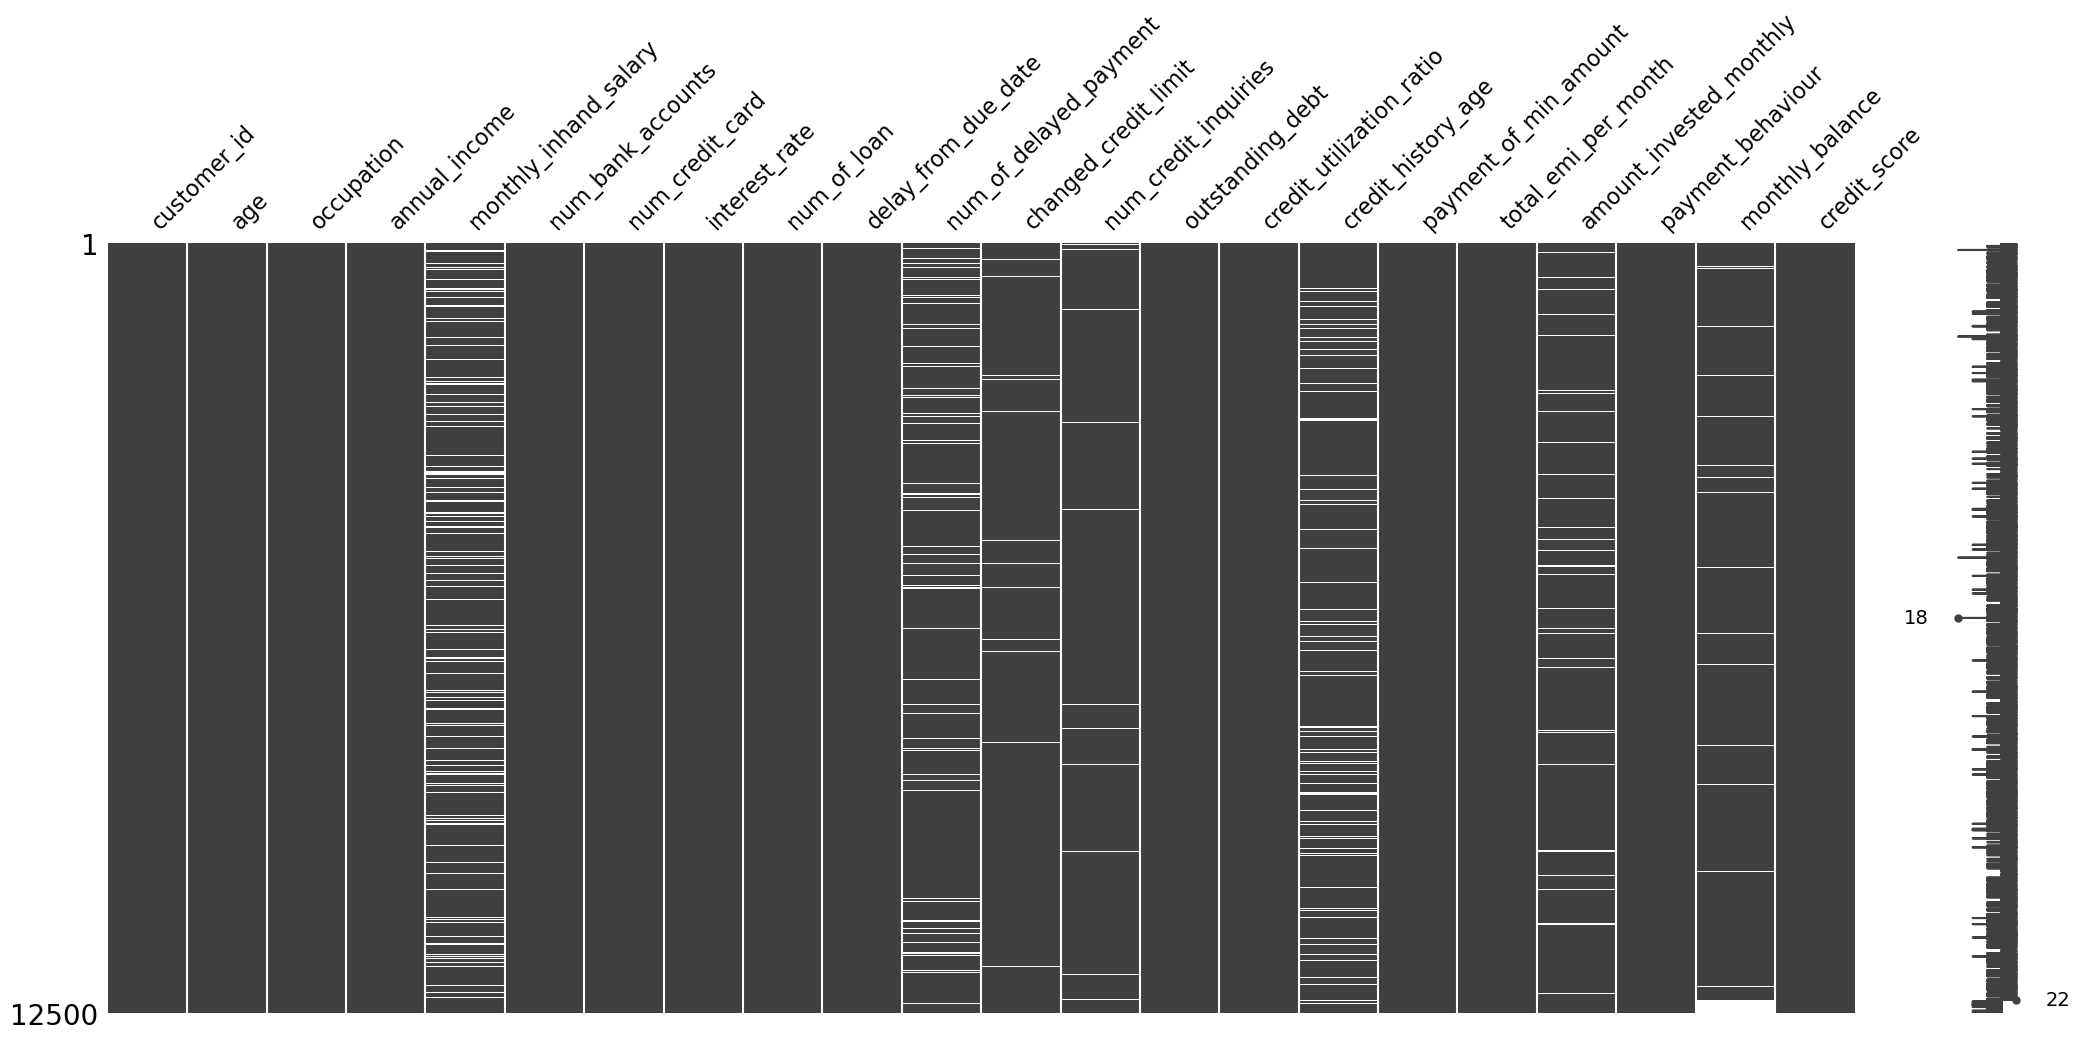

In [9]:
msno.matrix(df)
plt.show()

In [10]:
# Se eliminan los valores nulos
listed_train = X_train.isna().any(axis=1)
X_train  = X_train[~listed_train]
y_train = y_train[~listed_train]


listed_test = X_test.isna().any(axis=1)
X_test = X_test[~listed_test]
y_test = y_test[~listed_test]

Se optó por eliminar las filas con elementos faltantes debido a que era la opción más comoda y de acuerdo a las pruebas realizadas las métricas no mejoran significativamente para el tiempo de procesamiento que conlleva utilizar un imputador para los elementos.

#### 3.4 Feature Engineering [Bonus - 0.5 puntos]



En esta sección, se espera que apliquen su conocimiento y creatividad para identificar y construir características que brinden una mejor orientación a su modelo para identificar los casos deseados. Para motivar la construcción de nuevas características, se recomienda explorar las siguientes posibilidades:

- Generar ratios que relacionen variables categóricas con numéricas. Estos ratios permiten capturar relaciones proporcionales o comparativas entre diferentes categorías y valores numéricos.
- Combinación de rankings entre variables numéricas y categóricas.
- Discretización de variables numéricas a categóricas.
- Etc...

**Importantes**: Al explorar estas posibilidades no se limiten solo a estas propuestas, pueden aplicar otras técnicas de feature engineering pertinentes para mejorar la capacidad de su modelo para comprender y aprovechar los patrones presentes en los datos. 

### 4. Baseline [1.5 puntos]




_En esta sección deben crear los modelos más básicos posibles que resuelvan el problema dado. La idea de estos modelos son usarlos como comparación para que en el siguiente paso lo puedan mejorar._

Implemente, entrene y evalúe varias `Pipeline` enfocadas en resolver el problema de clasificación en donde la diferencia entre estas sea el modelo utilizado.


Para esto, cada Pipeline debe:

- Tener el `ColumnTransformer` implementado en la sección anterior como primer paso.
- Implementar un imputador en caso de haber decidido conservar los datos nulos.
- Implementar un clasificador en la salida (ver siguiente lista).
  
Y además, 
- Ser evaluado de forma general imprimiendo un `classification_report`.
- Calcular y guardar la métrica seleccionada en el punto 1.2 en un arreglo de métricas (guardar nombre y valor de la métrica).

Lo anterior debe ser implementado utilizando los siguientes modelos:

- `Dummy` con estrategia estratificada.
- `LogisticRegression`.
- `KNeighborsClassifier`.
- `DecisionTreeClassifier`
- `SVC`
- `RandomForestClassifier` 
- `LightGBMClassifier` (del paquete `lightgbm`)
- `XGBClassifier` (del paquete `xgboost`).


Luego, transformando el diccionario de las métricas a un pandas `DataFrame`, ordene según los valores de su métrica de mayor a menor y responda.
- ¿Hay algún clasificador entrenado mejor que el azar (`Dummy`)?
- ¿Cuál es el mejor clasificador entrenado?
- ¿Por qué el mejor clasificador es mejor que los otros?
- Respecto al tiempo de entrenamiento, con cual cree que sería mejor experimentar (piense en el tiempo que le tomaría pasar el modelo por una grilla de optimización de hiperparámetros).

**Nota**: Puede utilizar un for más una lista con las clases de los modelos mencionados para simplificar el proceso anterior.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [11]:
def train_model(model, X_train, y_train, X_test, y_test, target_names=['No riesgoso', 'Riesgoso'], df_for_metrics=None, model_name=None, random_state=None):
    
    # Verificar si el modelo admite el argumento 'random_state'
    if hasattr(model, 'random_state'):
        model.set_params(random_state=random_state)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy_var = accuracy_score(y_test, y_pred)
    f1_score_var = f1_score(y_test, y_pred, average='weighted')
    
    print(f"Accuracy: {accuracy_var}")
    print(f"F1 score: {f1_score_var}")
    
    print(classification_report(y_test, y_pred, target_names=target_names) + '\n')
    
    # Agregar el modelo al DataFrame df_for_metrics si se especifica
    if df_for_metrics is not None:
        new_row = pd.DataFrame([{'model': model_name, 'accuracy': accuracy_var, 'f1_score': f1_score_var}])
        df_for_metrics = pd.concat([df_for_metrics, new_row], ignore_index=True)
        
        return df_for_metrics

df_metrics = pd.DataFrame(columns = ['model', 'accuracy', 'f1_score'])

In [12]:
dummy = DummyClassifier(strategy='stratified')
logr = LogisticRegression()
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(criterion='entropy')
svc = SVC()
rf = RandomForestClassifier()
lgb = LGBMClassifier()
xgb  = XGBClassifier()


models = [dummy, logr, knn, tree, svc, rf, lgb, xgb]


for mod in models:

    print(str(mod))

    model = Pipeline(steps=[('preprocesamiento',prep),
                            (str(mod), mod)])

    df_metrics = train_model(model, X_train, y_train, X_test, y_test,
                        df_for_metrics = df_metrics, model_name = str(mod), random_state = 123)


df_metrics

DummyClassifier(strategy='stratified')
Accuracy: 0.5973618090452262
F1 score: 0.5931331481763821
              precision    recall  f1-score   support

 No riesgoso       0.71      0.73      0.72      1128
    Riesgoso       0.30      0.28      0.29       464

    accuracy                           0.60      1592
   macro avg       0.50      0.50      0.50      1592
weighted avg       0.59      0.60      0.59      1592


LogisticRegression()
Accuracy: 0.746859296482412
F1 score: 0.7215146808502568
              precision    recall  f1-score   support

 No riesgoso       0.77      0.91      0.84      1128
    Riesgoso       0.62      0.34      0.44       464

    accuracy                           0.75      1592
   macro avg       0.69      0.63      0.64      1592
weighted avg       0.73      0.75      0.72      1592


KNeighborsClassifier()


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.7097989949748744
F1 score: 0.6967461013333759
              precision    recall  f1-score   support

 No riesgoso       0.77      0.84      0.80      1128
    Riesgoso       0.50      0.38      0.43       464

    accuracy                           0.71      1592
   macro avg       0.64      0.61      0.62      1592
weighted avg       0.69      0.71      0.70      1592


DecisionTreeClassifier(criterion='entropy')
Accuracy: 0.6878140703517588
F1 score: 0.6899814248468756
              precision    recall  f1-score   support

 No riesgoso       0.79      0.77      0.78      1128
    Riesgoso       0.47      0.49      0.48       464

    accuracy                           0.69      1592
   macro avg       0.63      0.63      0.63      1592
weighted avg       0.69      0.69      0.69      1592


SVC()
Accuracy: 0.7587939698492462
F1 score: 0.7320343950248765
              precision    recall  f1-score   support

 No riesgoso       0.78      0.93      0.84      1128
    Riesgos

,model,accuracy,f1_score
0,DummyClassifier(strategy='stratified'),0.597362,0.593133
1,LogisticRegression(),0.746859,0.721515
2,KNeighborsClassifier(),0.709799,0.696746
3,DecisionTreeClassifier(criterion='entropy'),0.687814,0.689981
4,SVC(),0.758794,0.732034
5,RandomForestClassifier(),0.785176,0.773757
6,LGBMClassifier(),0.788317,0.780719
7,"XGBClassifier(base_score=None, booster=None, c...",0.773869,0.763246


### 5. Optimización del Modelo [1.5 puntos]



_En esta sección deben mejorar del modelo de clasificación al variar los algoritmos/hiperparámetros que están ocupando._

- Instanciar dos nuevas `Pipeline`, similares a la anterior, pero ahora enfocada en buscar el mejor modelo. Para esto, la pipelines debe utilizar el primer y segundo mejor modelo encontrado en el paso anterior.
- Usar **`GridSearchCV`** o **`HalvingGridSearchCV`** para tunear hipermarámetros. La primera demorará más que la segunda pero les traerá potencialmente mejores resultados.
- **Importante**: Recuerden setear la búsqueda para optimizar la métrica seleccionada en los puntos anteriores.

Algunas ideas para mejorar el rendimiento de sus modelos:

- Agregar técnicas de seleccion de atributos/características. El parámetro de cuántas características se seleccionan debe ser parametrizable y configurado por el optimizador de hiperparámetros.
- Variar el imputador de datos en caso de usarlo.

#### Bonus

1. **Optuna** [0.5 extras]: Pueden probar también [`OptunaSearchCV`](https://optuna.readthedocs.io/en/stable/reference/generated/optuna.integration.OptunaSearchCV.html) de la librería [`Optuna`](https://optuna.org/), la cuál es bastante popular para buscar modelos de redes neuronales.
2. **Visualización con Optuna** [0.2 extras]: Explore la documentación de visualización de Optuna en el siguiente [link](https://optuna.readthedocs.io/en/stable/reference/visualization/index.html) y realice un análisis sobre el proceso de optimización de hiperparámetros realizado.
3. **Imabalanced learn** [0.3 extras]: Al ser el problema desbalanceado, pueden probar técnicas para balancear automáticamente el dataset previo a ejecutar el modelo. Para esto, puede probar con los mecanismos implementados en la librería [Imbalanced learn](https://imbalanced-learn.org/). 
4. **Probar pycaret (AutoML) [0.3 extras]**.

Algunas notas interesantes sobre este proceso:

- No se les pide rendimientos cercanos al 100% de la métrica para concretar exitosamente el proyecto. Por otra parte, celebren cada progreso que obtengan.
- **Hacer grillas computables**: Si la grilla se va a demorar 1/3 la edad del universo en explorarse completamente, entonces achíquenla a algo que sepan que va a terminar.
- Aprovechen el procesamiento paralelo (con `njobs`) para acelerar la búsqueda. Sin embargo, si tienen problemas con la memoria RAM, reduzca la cantidad de jobs a algo que su computador/interprete web pueda procesar.
- La pipelines permiten cachear (guardar temporalmente) etapas cuyo cálculo es redudante, como por ejemplo el escalamiento y la imputación, acelerando así la computación. **Importante:** Para esto, cuando ejecuten `GridSearchCV`, agreguen a la pipeline en el parámetro `memory = "."`.

**Al final de este proceso, seleccione el mejor modelo encontrado, prediga el conjunto de prueba y reporte sus resultados.**

In [14]:
from sklearn.model_selection import GridSearchCV


pipe_1 = Pipeline(steps=[('preprocesamiento', prep),
                         ('Random Forest', RandomForestClassifier())], memory='.')


pipe_2 = Pipeline(steps=[('preprocesamiento', prep),
                         ('LGBM', LGBMClassifier())], memory='.')


param_grid_rf = {
    'Random Forest__n_estimators': [100, 200, 300],  # Número de árboles en el bosque.
    'Random Forest__max_depth': [None, 10, 20],  # Profundidad máxima de los árboles.
    'Random Forest__min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo.
    'Random Forest__min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras requeridas en un nodo hoja.
}


param_grid_lgbm = {
    'LGBM__n_estimators': [50, 100, 150],  # Número de árboles en el bosque.
    'LGBM__max_depth': [5, 10, 15],  # Profundidad máxima de los árboles.
    'LGBM__learning_rate': [0.1, 0.01, 0.001],  # Tasa de aprendizaje.
    'LGBM__min_child_samples': [1, 5, 10],  # Número mínimo de muestras requeridas en un nodo hoja.
}


grid_search_rf = GridSearchCV(estimator=pipe_1, param_grid=param_grid_rf, cv=5, scoring= 'f1_weighted', n_jobs=4)
grid_search_lgbm = GridSearchCV(estimator=pipe_2, param_grid=param_grid_lgbm, cv=5,scoring= 'f1_weighted', n_jobs=4)


grid_search_rf.fit(X_train, y_train)
grid_search_lgbm.fit(X_train, y_train)


print("Mejores parámetros encontrados:")
print(grid_search_rf.best_params_)
print("Mejor puntuación del modelo:")
print(grid_search_rf.best_score_)


print("Mejores parámetros encontrados:")
print(grid_search_lgbm.best_params_)
print("Mejor puntuación del modelo:")
print(grid_search_lgbm.best_score_)

Mejores parámetros encontrados:
{'Random Forest__max_depth': 10, 'Random Forest__min_samples_leaf': 2, 'Random Forest__min_samples_split': 2, 'Random Forest__n_estimators': 300}
Mejor puntuación del modelo:
0.7789057593593232
Mejores parámetros encontrados:
{'LGBM__learning_rate': 0.1, 'LGBM__max_depth': 5, 'LGBM__min_child_samples': 5, 'LGBM__n_estimators': 50}
Mejor puntuación del modelo:
0.7819653670215075


### 6. Interpretabilidad [1.0 puntos]

_En esta sección, se espera que los estudiantes demuestren su capacidad para explicar cómo sus modelos toman decisiones utilizando los datos. Dentro del análisis de interpretabilidad propuesto para el modelo, deberán ser capaces de:_

- Proponer un método para analizar la interpretabilidad del modelo. Es crucial que puedan justificar por qué el método propuesto es el más adecuado y explicar los alcances que podría tener en su aplicación.
- Identificar las características más relevantes del modelo. ¿La distribución de importancia es coherente y equitativa entre todas las variables?
- Analizar 10 observaciones aleatorias utilizando un método específico para verificar la coherencia de las interacciones entre las características.
- Explorar cómo se relacionan las variables utilizando algún descriptivo de interpretabilidad.
- ¿Existen variables irrelevantes en el problema modelado?, ¿Cuales son?.

Es fundamental que los estudiantes sean capaces de determinar si su modelo toma decisiones coherentes y evaluar el impacto que podría tener la aplicación de un modelo con esas variables en una población. ¿Es posible que el modelo sea perjudicial o que las estimaciones se basen en decisiones sesgadas?

En resumen, esta sección busca que los estudiantes apliquen un enfoque crítico para evaluar la interpretabilidad de su modelo, identificar posibles sesgos y analizar las implicaciones de sus decisiones en la población objetivo.

Para analizar la interpretabilidad del modelo se utilizarán dos métodos, el primero consiste en un permutation importance para verificar cuales son las variables que más influyen en la métrica escogida para evaluar el problema, de esta forma se tendrá un análisis global de las variables y su efecto en el modelo. Por otro lado, tambien se planean utilizar SHAP values para describir muestras locales, esto además nos permite identificar cuales son las variables que más importan a la hora de decidir si es que un cliente es riesgoso. 

In [15]:
pipe_rf_bestp = Pipeline(steps=[('preprocesamiento', prep),
                                ('Rf Best Params', RandomForestClassifier(max_depth=grid_search_rf.best_params_['Random Forest__max_depth'],
                                                                          min_samples_leaf=grid_search_rf.best_params_['Random Forest__min_samples_leaf'],
                                                                          min_samples_split=grid_search_rf.best_params_['Random Forest__min_samples_split'],
                                                                          n_estimators=grid_search_rf.best_params_['Random Forest__n_estimators']))])


pipe_lg_bestp = Pipeline(steps=[('preprocesamiento', prep),
                                ('LGBM Best Params', LGBMClassifier(learning_rate=grid_search_lgbm.best_params_['LGBM__learning_rate'],
                                                                    max_depth=grid_search_lgbm.best_params_['LGBM__max_depth'],
                                                                    min_child_samples=grid_search_lgbm.best_params_['LGBM__min_child_samples'],
                                                                    n_estimators = grid_search_lgbm.best_params_['LGBM__n_estimators']))])


pipe_rf_bestp.fit(X_train, y_train)
pipe_lg_bestp.fit(X_train, y_train)

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['age', 'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
       'credit_history_age', 'total_emi_per_month', 'amount_invested_monthly',
       'monthly_balance'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['occupation', 'payment_behaviour', 'payment_of_min_amount'], dtype='object'))])),
                ('LGBM Best Params',
                 LGBMClassifier(max_depth=5, min_child_samples=5,
                                n_estimators=50))])

In [16]:
y_pred = pipe_rf_bestp.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No Riesgoso', 'Riesgoso']) + '\n')

              precision    recall  f1-score   support

 No Riesgoso       0.82      0.90      0.86      1128
    Riesgoso       0.68      0.53      0.59       464

    accuracy                           0.79      1592
   macro avg       0.75      0.71      0.73      1592
weighted avg       0.78      0.79      0.78      1592




In [17]:
y_pred = pipe_lg_bestp.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No Riesgoso', 'Riesgoso']) + '\n')

              precision    recall  f1-score   support

 No Riesgoso       0.83      0.89      0.86      1128
    Riesgoso       0.67      0.55      0.60       464

    accuracy                           0.79      1592
   macro avg       0.75      0.72      0.73      1592
weighted avg       0.78      0.79      0.78      1592




In [18]:
from sklearn.inspection import permutation_importance


result = permutation_importance(pipe_rf_bestp.named_steps['Rf Best Params'], pd.DataFrame(prep.fit_transform(X_test)), y_test,scoring='f1_weighted', n_repeats=30, random_state=42)

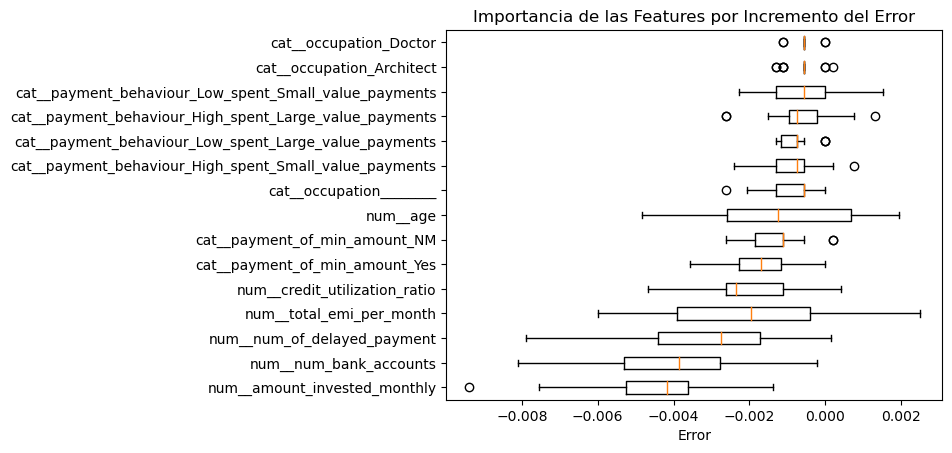

In [19]:
perm_sorted_idx = result.importances_mean.argsort()[:15]


plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=pipe_rf_bestp.named_steps['preprocesamiento'].get_feature_names_out()[perm_sorted_idx])


plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()

In [21]:
result = permutation_importance(pipe_lg_bestp.named_steps['LGBM Best Params'], pd.DataFrame(prep.fit_transform(X_test)), y_test,scoring='f1_weighted', n_repeats=30, random_state=42)

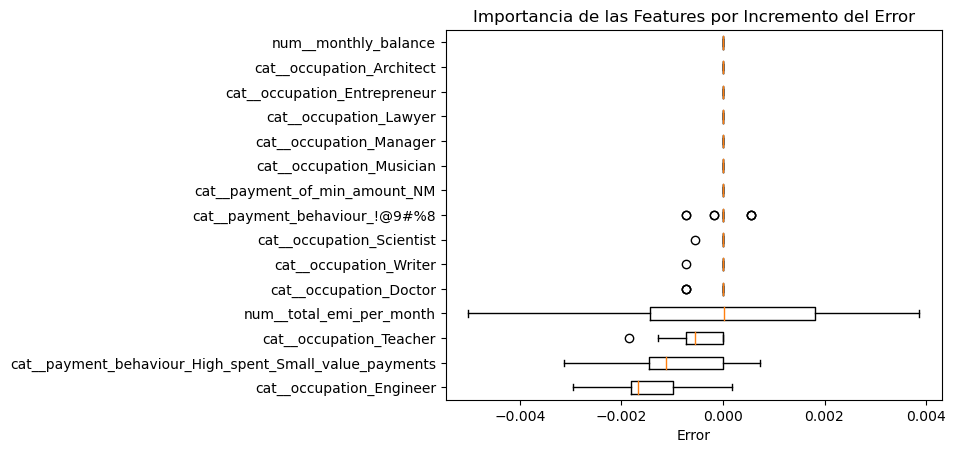

In [22]:
perm_sorted_idx = result.importances_mean.argsort()[:15]


plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=pipe_lg_bestp.named_steps['preprocesamiento'].get_feature_names_out()[perm_sorted_idx])


plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()

De acuerdo al gráfico obtenido se puede ver que en general las variables involucradas en la mayor variación de la métrica del modelo son aquellas relacionadas a circunstancias a los pagos de los clientes, como lo son "num of delayed payment" o "payment of min amount yes", lo cual tiene mucho sentido si consideramos que un cliente que tiene problemas para pagar las cantidades acordadas o a tiempo es un cliente riesgoso, sin embargo, hay otras variables como la ocupacion que pueden resultar poco significativos si consideramos que existen muchas y realizar análisis para cada una de ellas puede ser costoso, en general las variables que más aportar variabilidad tienen sentido para el problema, aunque no son equitativas ya que hay algunas como el comportamiento de pago por ejemplo que tiene baja varianza en comparacion al numero de cuentas bancarias o retrasos en el pago por ejemplo.

In [23]:
explainer_rf = shap.TreeExplainer(pipe_rf_bestp['Rf Best Params'])
explainer_lg = shap.TreeExplainer(pipe_lg_bestp['LGBM Best Params'])

In [24]:
random_sample = X_test.reset_index(drop=True).sample(10, random_state=123).index

In [25]:
choosen_instance = prep.transform(X_test.iloc[random_sample])
shap_values = explainer_rf.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer_rf.expected_value[1], shap_values[1], choosen_instance, feature_names=pipe_rf_bestp['preprocesamiento'].get_feature_names_out())

Aqui la explicacion de estos ejemplos

In [26]:
choosen_instance = prep.transform(X_test.iloc[random_sample])
shap_values = explainer_lg.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer_lg.expected_value[1], shap_values[1], choosen_instance,feature_names=pipe_rf_bestp['preprocesamiento'].get_feature_names_out())

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


Al utilizar SHAP values se puede verificar de mejor manera cuales son las variables que permiten identificar los clientes riesgosos, en este caso al utilizar un force plot para 10 muestras aleatorias se puede ver, eligiendo alguna de las 3 primeras opciones del menu desplegable superior y la primera del menu lateral, que las variables que más influyen en la clasificación de un cliente riesgoso son efectivamente aquellas que reflejan la constancia y cantidad de los pagos (si es que paga a tiempo y cuanto de su deuda paga), pero tambien hay otras nuevas variables que tambien aportan a la explicabilidad, como lo son la cantidad de deuda restante y la cantidad de interés de la deuda, lo cual tiene mucho sentido considerando el problema. Por otro lado, las variables que influyen en la clasificación de un cliente no riesgoso son aquellas que reflejan la antiguedad del cliente, como lo son por ejemplo el historial de crédito, también se tienen algunas que estan en ambos grupos, como lo es el interés y cantidad de la deuda, lo que sigue teniendo mucho sentido: a mayor deuda e interés, menos probabilidad de pago y viceversa.

Tambien en prudente mencionar que hay variables, como lo son aquellas que reglejan la ocupación de los clientes, que a pesar de que pueden influir en la decisión, son muy variadas y procesarlas implica la generación de nuevas columnas, haciendo el proceso menos eficiente para el valor que agrega considerar las variables. Esto se puede ver en el permutation importance del modelo LGBM, donde aparecen varias variables relacionadas a ocupaciones como importantes pero con malos valores estadísticos. 

Esto además es importante pues es posible que el modelo esté creando un sesgo de clientes de acuerdo a su ocupación, lo cual puede ser perjudicial para tanto para la imagen del banco como para los potenciales clientes.

### 7. Concluir [1.0 puntos]

_Aquí deben escribir una breve conclusión del trabajo que hicieron en donde incluyan (pero no se limiten) a responder las siguientes preguntas:_

- ¿Pudieron resolver exitosamente el problema?
- ¿Son aceptables los resultados obtenidos?
- ¿En que medida el EDA ayudó a comprender los datos en miras de generar un modelo predictivo?

Respecto a la clasificación:

- ¿Como fue el rendimiento del baseline para la clasificación?
- ¿Pudieron optimizar el baseline para la clasificación?
- ¿Que tanto mejoro el baseline de la clasificación con respecto a sus optimizaciones?

Finalmente:

- ¿Estuvieron conformes con sus resultados?
- ¿Creen que hayan mejores formas de modelar el problema?
- ¿En general, qué aprendieron del proyecto? ¿Qué no aprendieron y les gustaría haber aprendido?

**OJO** si usted decide responder parte de estas preguntas, debe redactarlas en un formato de informe y no responderlas directamente.

Otras Instrucciones

Recordar el uso de buenas prácticas de MLOPS como replicabilidad (fijar semillas aleatorias) o el uso del registro de experimentos (con MLFlow). Si bien son opcionales, es altamente recomendado su uso.

#### Respuestas
- ¿Pudieron resolver exitosamente el problema?


Sí, todos los modelos lograron resolver el problema de clasificación, ya que obtuvieron métricas superiores al modelo dummy tanto global como para la clase "Riesgoso" en precisión, recall, accuracy y f1-score. En particular, el valor f1-score del baseline es de 0.581 mientras que el lightgbm con parámetros iniciales tiene un f1-score de 0.781, haciedolo 0.2 mejor en esta métrica, por lo que este último es más efectivo que el Modelo dummy en clasificar tanto los ejemplos positivos como negativos de manera equilibrada, lo que nos permitirá identificar a los clientes más propensos a no pagar los créditos.


- ¿En que medida el EDA ayudó a comprender los datos en miras de generar un modelo predictivo?

El EDA permitió tener una comprensión de las variables involucradas en el problema, ya sea su tipo, su cantidad, etc. , ya que define que tipos de preprocesamiento se tienen que utilizar para dar con el mejor modelo así como también que tipo de modelo es posible ocupar para el problema. También entrega información relacionada a los valores faltantes puesto que permite identificar la calidad del dataset para tener una idea de los alcances del proyecto.



- ¿Son aceptables los resultados obtenidos?

La "aceptabilidad" de los resultados depende del contexto del problema. En particular en este caso podemos sugerir un modelo como aceptable cuando además de ser más efectivo que el modelo dummy, todas sus métricas (recall, precisión y f1-score) son mayores a 0.5 para la clase “riesgoso”.

Bajo este criterio el único modelo aceptable es el light gbm, quedando el random forest muy cerca de cumplir el criterio con un recall de la clase de riesgo de 0.49. El resto no sería aceptable ya que en alguna de sus métricas está bajo 0.5 para la clase Riesgoso, que es la con menor cantidad de registros y finalmente la que nos importa para definir si son riesgosos.

Complementando esta información, el accuracy del modelo dummy es de 0.58, mientras que el modelo LGBM que es el “Aceptable” alcanzó una accuracy superior de 78.8%, lo que sugiere un rendimiento razonablemente mejor al dummy. 


- ¿Cómo fue el rendimiento del baseline para la clasificación?

Primero, el caso base del modelo dummy con una estrategia 'stratified', obtuvo un f1-score weighted de 0.58, pero si vemos el f1-score de la clase riesgoso, este tuvo un rendimiento de 0.3, lo que indica en recall y precisión que solo el 30% de los valores predichos como Riesgosos fueron realmente riesgosos y de todos los verdaderamente riesgosos solo 30% fue predicho. Este análisis nos hace pensar que el rendimiento del Dummy fue bastante bajo e inaceptable como modelo de clasificación para lo que se quiere utilizar.

Luego, todos los modelos posteriores ejecutados en el apartado de baseline obtuvieron mejores resultados, siendo el lightgbm el de mejor rendimiento, por lo cual este será considerado como baseline de ahora en adelante, el cual tiene los siguientes resultados:

LGBMClassifier()
Accuracy: 0.788
F1 score: 0.781
 
|           | precision | recall | f1-score | support |
|-----------|-----------|--------|----------|---------|
| No riesgoso |   0.82    |  0.89  |   0.86   |  1128   |
| Riesgoso    |   0.67    |  0.54  |   0.60   |   464   |
| accuracy     |          |        |  0.79    |  1592   |
| macro avg    |   0.75    |  0.71  |  0.73    |  1592   |
| weighted avg |   0.78    |  0.79  |  0.78    |  1592   |


Vale la pena agregar que el rendimiento del random forest está muy cercano al del lightgbm y probablemente con otra partición de datos o variando los parámetros este pueda ser mejor que el lightgbm, ya que pareciera una diferencia no significativa.


- ¿Pudieron optimizar el baseline para la clasificación? / ¿Qué tanto mejoró el baseline de la clasificación con respecto a sus optimizaciones?


Sí, los modelos optimizados (RandomForestClassifier, LGBMClassifier) lograron obtener f1-scores más altos que su versión anterior, en particular, la optimización del Lightgbm superó ligeramente a su versión anterior denominada como baseline, en particular en la clase riesgosa, el recall subió de 0.54 a 0.55, lo que no es un gran cambio. En cuanto al modelo de random forest, este también llegó a los mismos niveles que el baseline con un f1-score de 0.78, pero con un recall de la clase riesgosa de 0.53 (1 punto menor que el baseline) aunque una precision de la clase riescosa de 0.68 (un punto mayor que el baseline), lo que en la práctica son resultados iguales.

A continuación el reporte del modelo optimizado:

|            | precision | recall | f1-score | support |
|------------|-----------|--------|----------|---------|
| No Riesgoso |   0.83    |  0.89  |   0.86   |  1128   |
| Riesgoso    |   0.67    |  0.55  |   0.60   |   464   |
| accuracy     |          |        |  0.79    |  1592   |
| macro avg    |   0.75    |  0.72  |  0.73    |  1592   |
| weighted avg |   0.78    |  0.79  |  0.78    |  1592   |

Como se ve, mejoro un punto en la precision de la clase No riesgoso y un punto en el recall de la clase Riesgoso.


- ¿Estuvieron conformes con sus resultados?

Los resultados obtenidos fueron satisfactorios, ya que los modelos lograron resolver el problema de clasificación y mejorar el rendimiento del caso dummy sin problema por bastante, luego entre ellos había mejores modelos dependiendo de la métrica con la que se midiera. Sin embargo, los modelos optimizados lograron mejorar solo ligeramente el rendimiento del baseline de la parte anterior, lo que sugiere que los modelos no fueron capaces de mejorar mucho más a partir de los parámetros y quizás faltaron cambios en otra parte del pipeline como el feature engineering.


- ¿Creen que hayan mejores formas de modelar el problema?

Este podría modelarse como valores continuos de riesgo entre 0 y 1 y ver como varía la clasificación de riesgo de los clientes dependiendo el umbral de riesgo que se setea, quizás una opción para implementar lo dicho anteriormente sería tener distintos umbrales dependiendo del monto del crédito al cual quieren acceder los clientes, ya que no es lo mismo el impago de un crédito de 100.000 que uno de 1.000.000, por lo que el riesgo que se está dispuesto a asumir podría ser distinto y permitir a clientes con mayor probabilidad de impago a obtener créditos de menor nivel.



En conclusión, los modelos optimizados lograron resolver el problema de clasificación y mejoraron significativamente el rendimiento del modelo dummy, pero no mucho más con respecto al mejor baseline (lightgbm). Los resultados obtenidos, medidos principalmente por el f1-score, precisiones y recalls generales y para la clase "Riesgoso", indican que los modelos son efectivos en la identificación de ejemplos positivos y negativos, por lo que ayudará a identificar a las personas riesgosas en base al criterio definido. 




- ¿En general, qué aprendieron del proyecto? ¿Qué no aprendieron y les gustaría haber aprendido?

Lo mejor del proyecto fue poder realizar un trabajo completo de clasificación, desde el análisis exploratorio hasta la optimización de hiperparámetros e interpretabilidad de los modelos, tener la oportunidad de concretar todo un proyecto de esta envergadura otorga experiencia en problemas que surgen a medida que se desarrollan los trabajos similares, como son problemas con el preprocesado, problemas con las dimensiones de algunos objetos, uso de librerías más complejas, etc. 

Por otro lado, nos hubiera gustado aprender modelos más complejos, o trabajar con problemáticas más complejas, como clasificación de imágenes, redes neuronales, etc.

### 8. Bonus: Implementación de Kedro y FastAPI [1.5 puntos]

**OPCIONAL**

En esta sección se les solicita utilizar las últimas tecnologías vistas en el curso para la productivización del proyecto de ciencia de datos, centrándose en la organización y gestión de los flujos de trabajo a través de componentes y pipelines, más el servicio del modelo a través del desarrollo de una API.

Para esto: 

1. Genere un proyecto de `Kedro` en donde separe por responsabilidades los nodos/componentes de su proyecto de ciencia de datos en módulos separados. [1.0 puntos]
2. Genere un servidor basado en `FastAPI` el cuál a través de un método post, reciba un batch de datos y genere predicciones para cada uno de ellos. [0.5 puntos]

Las implementaciones son libres. Es decir, usted decide qué componentes implementar, como usar el catálogo de datos y la parametrización del flujo. Sin embargo, evaluaremos buen uso de los framework, modularización y separación de responsabilidades.
